<a href="https://colab.research.google.com/github/Sujal3141/K_means_clusterrring_implementation/blob/main/K_means_clusterrring_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
x = random.sample(range(1000),60)
y= random.sample(range(1000),60)

In [8]:
x

[407,
 637,
 243,
 259,
 7,
 327,
 629,
 42,
 499,
 252,
 548,
 510,
 410,
 166,
 161,
 421,
 391,
 584,
 716,
 998,
 640,
 643,
 641,
 467,
 537,
 599,
 783,
 12,
 60,
 293,
 630,
 799,
 594,
 759,
 489,
 605,
 922,
 145,
 194,
 943,
 238,
 612,
 511,
 860,
 440,
 190,
 168,
 447,
 704,
 138,
 418,
 278,
 664,
 239,
 971,
 71,
 342,
 53,
 832,
 565]

In [7]:
y

[694,
 448,
 558,
 947,
 236,
 248,
 919,
 19,
 187,
 955,
 44,
 935,
 457,
 86,
 817,
 200,
 266,
 373,
 349,
 3,
 749,
 272,
 410,
 667,
 261,
 240,
 787,
 515,
 595,
 567,
 358,
 264,
 42,
 855,
 180,
 884,
 514,
 545,
 822,
 513,
 965,
 432,
 178,
 131,
 362,
 844,
 805,
 454,
 276,
 164,
 914,
 668,
 591,
 181,
 557,
 520,
 551,
 186,
 80,
 680]

In [52]:
import pandas as pd
df = pd.DataFrame({'x':x,'y':y,'cluster':0})

In [33]:
df

,x,y,cluster
0,407,694,0
1,637,448,0
2,243,558,0
3,259,947,0
4,7,236,0
5,327,248,0
6,629,919,0
7,42,19,0
8,499,187,0
9,252,955,0


In [53]:
from numpy._core.fromnumeric import mean
from numpy import minimum
df = df.reset_index(drop=True)
best_wcss = -1
wcss_array = []
k_array = []
for k in range(3,10): #k is no of cluster
  random.seed(10)
  data_points_index = random.sample(range(60),k)
  x1 = []
  y1 = []
  for i in data_points_index:
    x1.append(df.loc[i,'x'])
    y1.append(df.loc[i,'y'])

  data_points = pd.DataFrame({'xd':x1,'yd':y1}) # k data points corresponding to  k  centroid
    # data_points.reset_index(drop=True)

  for i in range(60):
        min_distance = 1000
        for j in range(k):
          distance = (df.loc[i,'x']-data_points.loc[j,'xd'])**2 + (df.loc[i,'y']-data_points.loc[j,'yd'])**2
          if min_distance > distance:
            min_distance = distance
            df.loc[i,'cluster'] = j
  t = 1
  while(t < 100 ):
    for j in range(k):
      mean_x = 0
      mean_y = 0
      count = 0
      for i in range(60):

        if(df.loc[i,'cluster']==j):

          mean_x = mean_x + df.loc[i,'x']
          mean_y = mean_y + df.loc[i,'y']
          count = count + 1
      if (count == 0): # j is very far so j point is itself a cluster
        continue
      else:
        mean_x = mean_x/count
        mean_y = mean_y/count
        data_points.loc[j,'xd'] = mean_x
        data_points.loc[j,'yd'] = mean_y

    for i in range(60):
        min_distance = 1000
        for j in range(k):
          distance = (df.loc[i,'x']-data_points.loc[j,'xd'])**2 + (df.loc[i,'y']-data_points.loc[j,'yd'])**2
          if min_distance > distance:
            min_distance = distance
            df.loc[i,'cluster'] = j

    t = t+1
  wcss = 0
  for i in range(60):
    wcss = wcss + (df.loc[i,'x']-data_points.loc[int(df.loc[i,'cluster']),'xd'])**2 + (df.loc[i,'y']-data_points.loc[int(df.loc[i,'cluster']),'yd'])**2
  wcss_array.append(wcss)
  k_array.append(k)






/tmp/ipython-input-1157688649.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '473.2413793103448' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_points.loc[j,'xd'] = mean_x
/tmp/ipython-input-1157688649.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '469.7758620689655' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_points.loc[j,'yd'] = mean_y
/tmp/ipython-input-1157688649.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '470.49122807017545' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_points.loc[j,'xd'] = mean_x
/tmp/ipython-input-1157688649.py:45: FutureWarning: Setting an item of incompa

In [31]:
df.shape

(60, 3)

In [36]:
data_points

,xd,yd
0,53,186


In [39]:
print(df.index)

RangeIndex(start=0, stop=60, step=1)


In [40]:
print(df.columns)

Index(['x', 'y', 'cluster'], dtype='object')


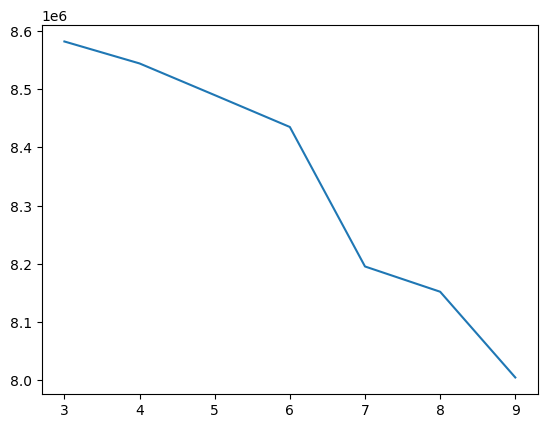

In [54]:
import matplotlib.pyplot as plt
plt.plot(k_array,wcss_array)
plt.show()